In [1]:
import pandas as pd
df= pd.read_csv('third_study_data.csv')

In [2]:
df['do_youHave_medical_insurance'] = df['do_youHave_medical_insurance'].replace({1: 0, 2: 0, 3: 1}) # yes 0, no 1, good to bad

# Check the updated value counts
print("\nUpdated value counts for 'do_youHave_medical_insurance':")
print(df['do_youHave_medical_insurance'].value_counts())


Updated value counts for 'do_youHave_medical_insurance':
do_youHave_medical_insurance
0.000000    9171
1.000000    9082
2.206925    2853
Name: count, dtype: int64


In [3]:
df['current_gender'] = df['current_gender'].replace({1: 1, 2: 2, 3: 3, 4:3, 5:3})

# Check the updated value counts
print("\nUpdated value counts for 'current_gender':")
print(df['current_gender'].value_counts())


Updated value counts for 'current_gender':
current_gender
2.0    12913
1.0     7854
6.0      187
3.0       87
0.0       65
Name: count, dtype: int64


In [4]:
def categorize_relationship(code):
    if code == 1:
        return 2  # single
    elif code in [2, 4]:
        return 1  # married
    elif code in [3, 5]:
        return 3  # divorced
    else:
        return None  # Undefined status for other values

# Apply the categorization to the existing column
df['current_relationship_status'] = df['current_relationship_status'].apply(categorize_relationship)

# Display the updated categorized data
print(df['current_relationship_status'].value_counts())

current_relationship_status
2    11214
1     8513
3     1379
Name: count, dtype: int64


In [5]:
df['birth_year'] = df['birth_year'].astype(int)
df['birth_year'].value_counts()
reference_year = 2021
df['current_age'] = reference_year - df['birth_year']

In [6]:
def map_income_level(code):
    if code in [6, 8, 9, 11, 14, 16, 21, 31, 35, 36, 41, 42, 44, 45, 46]:
        return 4 #'High'
    elif code in [1, 2, 3, 4, 5, 7, 12, 15, 17, 23, 24, 25, 34, 40, 43, 51]:
        return 3 # #'Upper-Middle'
    elif code in [10, 13, 19, 20, 28, 29, 50, 52]:
        return 2 #'Lower-Middle'
    elif code in [0, 18, 22, 26, 27, 30, 32, 33, 37, 38, 39, 47, 48, 49, 53]:
        return 1 #'Low'
    else:
        return 0 #'Unknown'

df['country_income_profile'] = df['country_ofResidence'].apply(map_income_level)

In [7]:
columns_to_drop = [
   'birth_year','genderAt_birth', 'country_ofResidence'   
    
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

C:\Users\fardo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


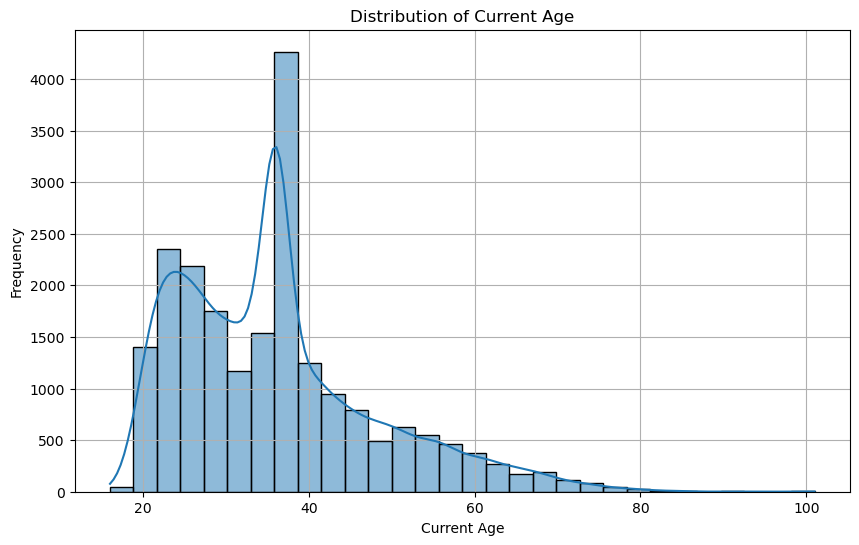

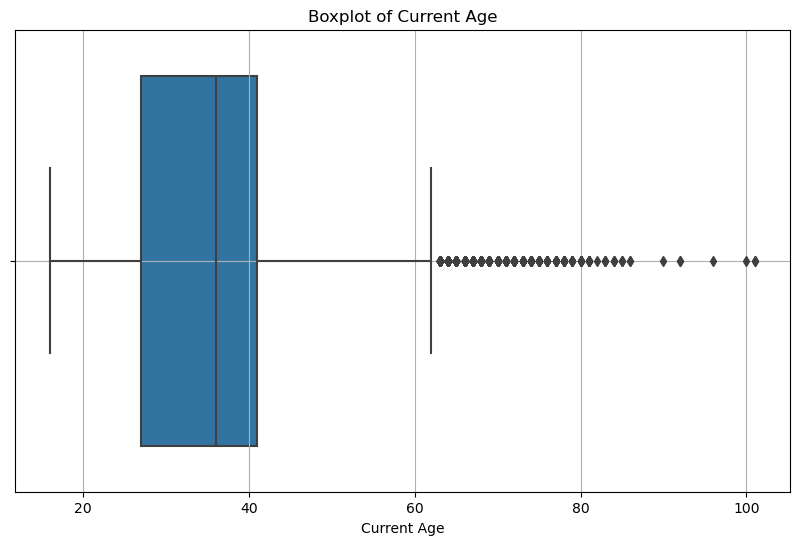

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Check the distribution of the current_age variable
plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(df['current_age'], bins=30, kde=True)
plt.title('Distribution of Current Age')
plt.xlabel('Current Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['current_age'])
plt.title('Boxplot of Current Age')
plt.xlabel('Current Age')
plt.grid(True)
plt.show()

In [9]:
import numpy as np
lower_bound = df['current_age'].quantile(0.05)  # 5th percentile
upper_bound = df['current_age'].quantile(0.96)  # 95th percentile
df['current_age'] = np.where(df['current_age'] < lower_bound, lower_bound,
                                     np.where(df['current_age'] > upper_bound, upper_bound, df['current_age']))

C:\Users\fardo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


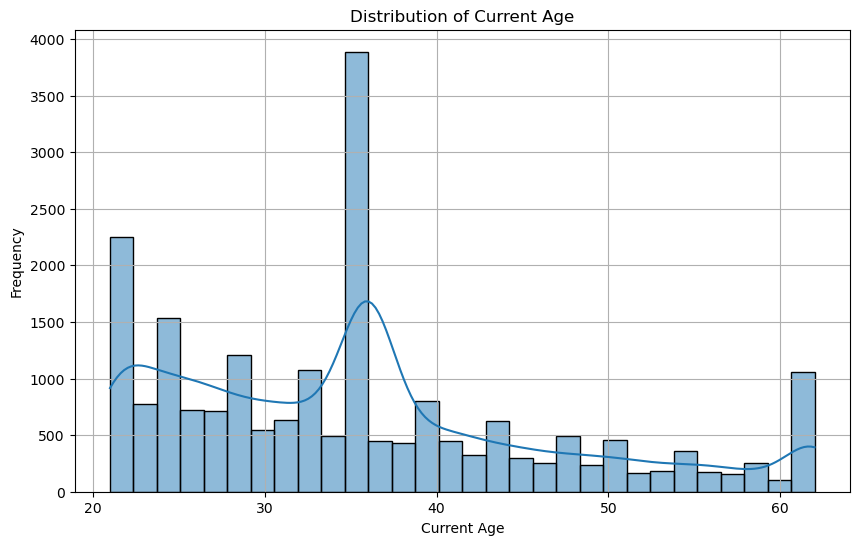

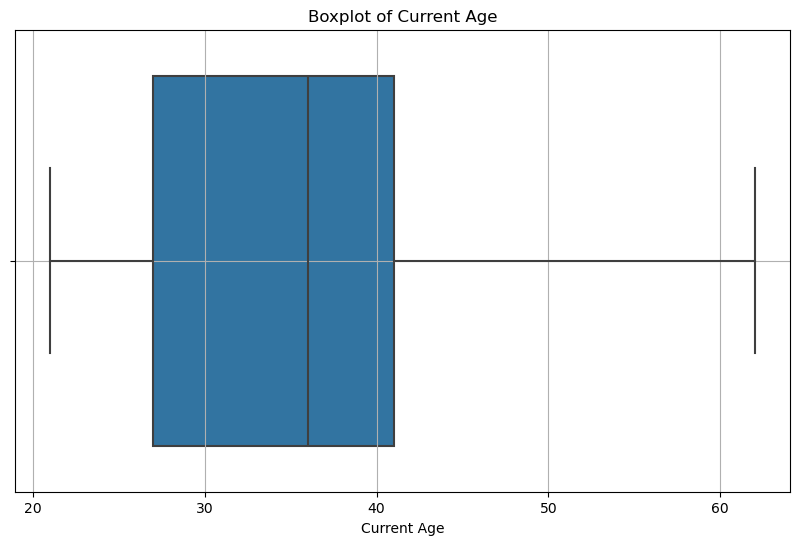

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Check the distribution of the current_age variable
plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(df['current_age'], bins=30, kde=True)
plt.title('Distribution of Current Age')
plt.xlabel('Current Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['current_age'])
plt.title('Boxplot of Current Age')
plt.xlabel('Current Age')
plt.grid(True)
plt.show()

In [11]:
# Check value counts for pre and post mental health outcomes variables
for post_var in df:
    print(f"\nValue counts for post variable: {post_var}")
    
    # Calculate value counts and percentages
    value_counts = df[post_var].value_counts()
    percentages = df[post_var].value_counts(normalize=True) * 100
    
    # Combine counts and percentages into a DataFrame
    counts_df = pd.DataFrame({
        'Counts': value_counts,
        'Percentage': percentages
    })
    
    print(counts_df)
    print("\n" + "-" * 50 + "\n")


Value counts for post variable: Level_ofEducation
                   Counts  Percentage
Level_ofEducation                    
4.000000             8946   42.386051
5.000000             5351   25.352980
3.000000             3214   15.227897
4.018024             2853   13.517483
2.000000              418    1.980479
1.000000              324    1.535108

--------------------------------------------------


Value counts for post variable: current_work_status
                     Counts  Percentage
current_work_status                    
1.000000               6900   32.692125
8.000000               4380   20.752393
3.950419               2853   13.517483
3.000000               1922    9.106415
2.000000               1529    7.244385
4.000000               1264    5.988818
9.000000                789    3.738273
7.000000                727    3.444518
6.000000                387    1.833602
5.000000                355    1.681986

--------------------------------------------------


Value

In [12]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)
df.isnull().sum()

Level_ofEducation                                                                                   0
current_work_status                                                                                 0
do_youHave_medical_insurance                                                                        0
currently_liveWith_whom                                                                             0
current_relationship_status                                                                         0
current_gender                                                                                      0
whatIs_your_sexual_orientation                                                                      0
have_behaviour_like_engage_inTansctional_sex                                                        0
have_behaviour_like_inject_drug_using_niddle                                                        0
have_behaviour_like_not_applicable                                                

# feature selection

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, SelectFromModel, mutual_info_regression
from sklearn.metrics import mean_squared_error
from boruta import BorutaPy
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def comprehensive_feature_selection(X, y, n_features=20, random_state=42):
    """
    Perform comprehensive feature selection using multiple methods
    Returns selected features and importance scores from each method
    """
    results = {}
    
    # 1. Correlation Analysis
    print("\n1. Running Correlation Analysis...")
    corr_matrix = X.corrwith(y)
    corr_features = corr_matrix.abs().sort_values(ascending=False).index[:n_features]
    results['Correlation'] = corr_features.tolist()
    
    # 2. Mutual Information
    print("2. Running Mutual Information...")
    mi_scores = mutual_info_regression(X, y, random_state=random_state)
    mi_features = X.columns[np.argsort(mi_scores)[-n_features:][::-1]]
    results['Mutual_Info'] = mi_features.tolist()
    
    # 3. Recursive Feature Elimination (RFE)
    print("3. Running Recursive Feature Elimination...")
    estimator = RandomForestRegressor(random_state=random_state)
    selector = RFE(estimator, n_features_to_select=n_features, step=1)
    selector.fit(X, y)
    rfe_features = X.columns[selector.support_]
    results['RFE'] = rfe_features.tolist()
    
    # 4. Feature Importance from Random Forest
    print("4. Running Random Forest Feature Importance...")
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X, y)
    importances = pd.Series(rf.feature_importances_, index=X.columns)
    rf_features = importances.sort_values(ascending=False).index[:n_features]
    results['RF_Importance'] = rf_features.tolist()
    
    # 5. Boruta Feature Selection
    print("5. Running Boruta Feature Selection...")
    rf_boruta = RandomForestRegressor(n_jobs=-1, max_depth=5, random_state=random_state)
    boruta_selector = BorutaPy(rf_boruta, n_estimators='auto', verbose=0, random_state=random_state)
    boruta_selector.fit(X.values, y.values)
    boruta_features = X.columns[boruta_selector.support_]
    results['Boruta'] = boruta_features.tolist()
    
    # 6. XGBoost Feature Importance
    print("6. Running XGBoost Feature Importance...")
    xgb = XGBRegressor(random_state=random_state)
    xgb.fit(X, y)
    xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns)
    xgb_features = xgb_importances.sort_values(ascending=False).index[:n_features]
    results['XGB_Importance'] = xgb_features.tolist()
    
    # Create a summary DataFrame
    feature_votes = pd.DataFrame(index=X.columns)
    for method, features in results.items():
        feature_votes[method] = 0
        feature_votes.loc[features, method] = 1
    
    feature_votes['Total_Votes'] = feature_votes.sum(axis=1)
    feature_votes = feature_votes.sort_values('Total_Votes', ascending=False)
    
    # Select top features based on consensus
    selected_features = feature_votes[feature_votes['Total_Votes'] >= 3].index.tolist()
    
    # If not enough features meet the threshold, take top n_features
    if len(selected_features) < n_features:
        selected_features = feature_votes.index[:n_features].tolist()
    
    return selected_features, feature_votes, results

def visualize_feature_selection(feature_votes, results):
    """Visualize feature selection results"""
    plt.figure(figsize=(15, 10))
    
    # 1. Plot feature votes
    plt.subplot(2, 2, 1)
    feature_votes['Total_Votes'].sort_values().plot(kind='barh')
    plt.title('Total Votes Across All Methods')
    plt.xlabel('Number of Selection Methods')
    
    # 2. Plot heatmap of selection methods
    plt.subplot(2, 2, 2)
    sns.heatmap(feature_votes.iloc[:20].drop('Total_Votes', axis=1), 
                cmap='Blues', annot=True, fmt='d')
    plt.title('Feature Selection by Different Methods (Top 20)')
    
    # 3. Plot overlapping features
    plt.subplot(2, 2, 3)
    from matplotlib_venn import venn2, venn3
    if len(results) >= 3:
        set1 = set(results['Boruta'])
        set2 = set(results['RF_Importance'])
        set3 = set(results['XGB_Importance'])
        venn3([set1, set2, set3], ('Boruta', 'RF Importance', 'XGB Importance'))
    plt.title('Overlap Between Key Selection Methods')
    
    plt.tight_layout()
    plt.show()

def evaluate_feature_set(X_train, y_train, X_val, y_val, feature_sets):
    """
    Evaluate different feature sets using cross-validation
    Returns performance metrics for each feature set
    """
    metrics = {}
    
    for name, features in feature_sets.items():
        print(f"\nEvaluating feature set: {name}")
        print(f"Number of features: {len(features)}")
        
        # Get the subset of features
        X_train_sub = X_train[features]
        X_val_sub = X_val[features]
        
        # Use a simple model for evaluation
        model = RandomForestRegressor(random_state=42)
        
        # Cross-validation score
        cv_scores = cross_val_score(model, X_train_sub, y_train, 
                                  cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.mean(np.sqrt(-cv_scores))
        
        # Validation score
        model.fit(X_train_sub, y_train)
        val_pred = model.predict(X_val_sub)
        val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
        
        metrics[name] = {
            'num_features': len(features),
            'cv_rmse': cv_rmse,
            'val_rmse': val_rmse,
            'features': features
        }
        
        print(f"CV RMSE: {cv_rmse:.4f}, Val RMSE: {val_rmse:.4f}")
    
    return metrics

In [14]:
def select_and_interpret_features(df, target_col='ptsd_composite', test_size=0.2, random_state=42):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Scale numerical features
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    # Run comprehensive feature selection
    selected_features, feature_votes, selection_results = comprehensive_feature_selection(
        X_train_scaled, y_train, n_features=20, random_state=random_state)
    
    # Visualize feature selection results
    visualize_feature_selection(feature_votes, selection_results)
    
    # Create different feature sets to evaluate
    feature_sets = {
        'Consensus': selected_features,
        'Boruta': selection_results['Boruta'],
        'RF_Importance': selection_results['RF_Importance'],
        'XGB_Importance': selection_results['XGB_Importance'],
        'Mutual_Info': selection_results['Mutual_Info']
    }
    
    # Evaluate feature sets
    metrics = evaluate_feature_set(X_train_scaled, y_train, X_test_scaled, y_test, feature_sets)
    
    # Select best feature set based on validation RMSE
    best_set = min(metrics.items(), key=lambda x: x[1]['val_rmse'])
    print(f"\nBest feature set: {best_set[0]} with Val RMSE: {best_set[1]['val_rmse']:.4f}")
    
    # Feature importance analysis for the best set
    print("\nFeature Importance Analysis for Best Set:")
    best_features = best_set[1]['features']
    
    # Train a model on best features
    model = RandomForestRegressor(random_state=random_state)
    model.fit(X_train_scaled[best_features], y_train)
    
    # Get feature importances
    importances = pd.Series(model.feature_importances_, 
                           index=best_features, 
                           name='Importance').sort_values(ascending=False)
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    importances.plot(kind='barh')
    plt.title('Feature Importances in Best Model')
    plt.xlabel('Relative Importance')
    plt.show()
    
    # Return the best features and metrics
    return {
        'best_features': best_features,
        'feature_metrics': metrics,
        'feature_votes': feature_votes,
        'X_train': X_train_scaled,
        'y_train': y_train,
        'X_test': X_test_scaled,
        'y_test': y_test
    }


1. Running Correlation Analysis...
2. Running Mutual Information...
3. Running Recursive Feature Elimination...
4. Running Random Forest Feature Importance...
5. Running Boruta Feature Selection...
6. Running XGBoost Feature Importance...


C:\Users\fardo\AppData\Local\Temp\ipykernel_16360\640063040.py:110: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


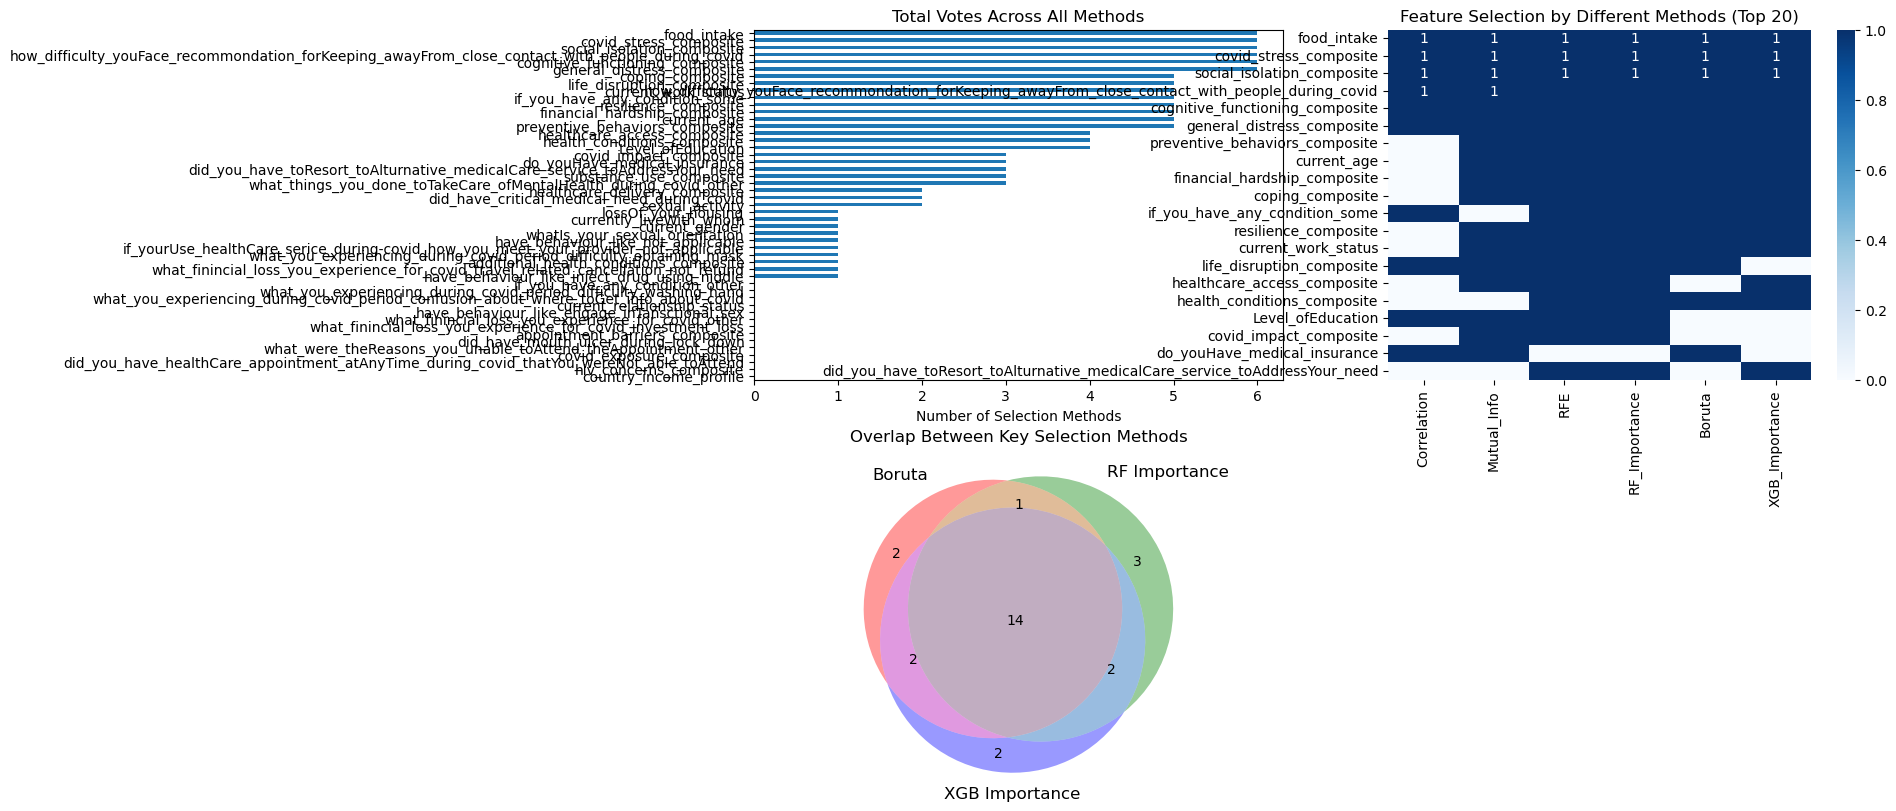


Evaluating feature set: Consensus
Number of features: 22
CV RMSE: 10.3189, Val RMSE: 10.2616

Evaluating feature set: Boruta
Number of features: 19
CV RMSE: 10.3823, Val RMSE: 10.4288

Evaluating feature set: RF_Importance
Number of features: 20
CV RMSE: 10.3413, Val RMSE: 10.2521

Evaluating feature set: XGB_Importance
Number of features: 20
CV RMSE: 10.2843, Val RMSE: 10.3298

Evaluating feature set: Mutual_Info
Number of features: 20
CV RMSE: 10.4277, Val RMSE: 10.5229

Best feature set: RF_Importance with Val RMSE: 10.2521

Feature Importance Analysis for Best Set:


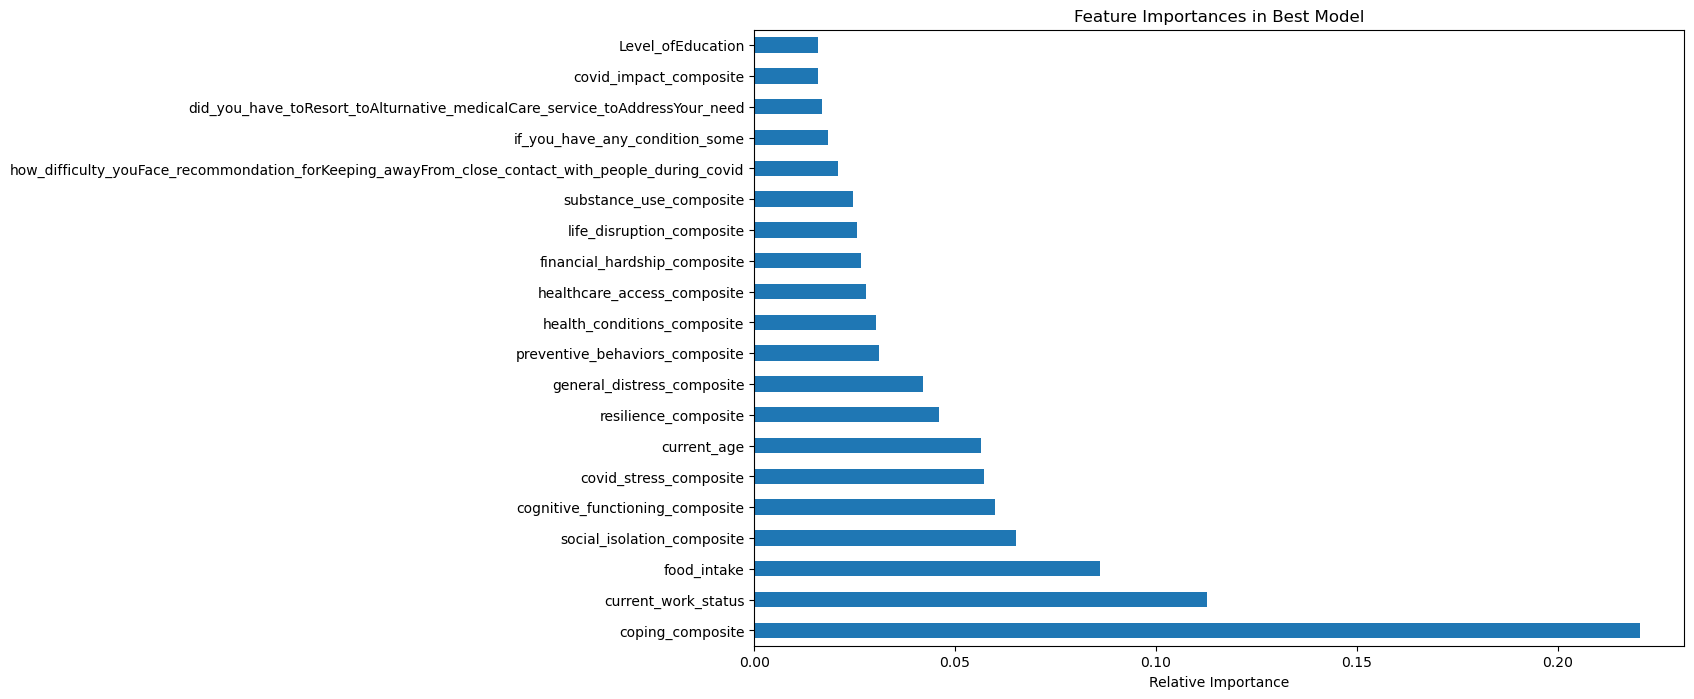


Top 30 Most Important Features:
['coping_composite', 'current_work_status', 'food_intake', 'social_isolation_composite', 'covid_stress_composite', 'cognitive_functioning_composite', 'current_age', 'general_distress_composite', 'resilience_composite', 'health_conditions_composite', 'preventive_behaviors_composite', 'healthcare_access_composite', 'life_disruption_composite', 'financial_hardship_composite', 'substance_use_composite', 'if_you_have_any_condition_some', 'how_difficulty_youFace_recommondation_forKeeping_awayFrom_close_contact_with_people_during_covid', 'did_you_have_toResort_toAlturnative_medicalCare_service_toAddressYour_need', 'Level_ofEducation', 'covid_impact_composite']


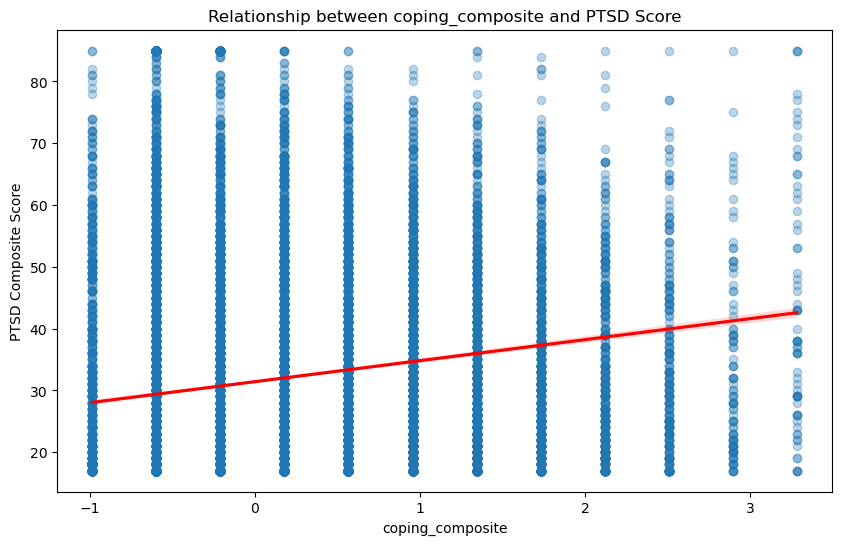

In [15]:
# Run the feature selection and interpretation
results = select_and_interpret_features(df)

# After running, you can further analyze:
best_features = results['best_features']
print("\nTop 30 Most Important Features:")
print(best_features[:30])

# You can examine the distribution of top features vs target
top_feature = best_features[0]
plt.figure(figsize=(10, 6))
sns.regplot(x=results['X_train'][top_feature], y=results['y_train'], 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title(f'Relationship between {top_feature} and PTSD Score')
plt.ylabel('PTSD Composite Score')
plt.show()

In [16]:
# =============================================
# 1. Data Preparation with Proper Splitting
# =============================================
def load_and_prepare_data(df, target_col='ptsd_composite', test_size=0.10, val_size=0.10, random_state=42):
    """Proper 3-way data splitting (train/val/test)"""
    # Initial train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=[target_col]),
        df[target_col],
        test_size=test_size,
        random_state=random_state
    )
    
    # Further split train into train-val
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train,
        test_size=val_size/(1-test_size), 
        random_state=random_state
    )
    
    print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")
    return X_train, X_val, X_test, y_train, y_val, y_test

In [20]:
# =============================================
# Data Preparation
# =============================================
top_features = [
    'coping_composite', 'current_work_status', 'food_intake', 
    'social_isolation_composite', 'covid_stress_composite',
    'cognitive_functioning_composite', 'current_age',
    'general_distress_composite', 'resilience_composite',
    'health_conditions_composite', 'preventive_behaviors_composite',
    'healthcare_access_composite', 'life_disruption_composite',
    'financial_hardship_composite', 'substance_use_composite',
    'if_you_have_any_condition_some',
    'how_difficulty_youFace_recommondation_forKeeping_awayFrom_close_contact_with_people_during_covid',
    'did_you_have_toResort_toAlturnative_medicalCare_service_toAddressYour_need',
    'Level_ofEducation', 'covid_impact_composite'
]

X_train, X_val, X_test, y_train, y_val, y_test = load_and_prepare_data(df)

Train: (14774, 49), Val: (3166, 49), Test: (3166, 49)


In [32]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from blitz.modules import BayesianLinear
from blitz.utils import variational_estimator
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
from scipy.stats import norm
import matplotlib.pyplot as plt

# =============================================
# Enhanced Bayesian Model Architecture
# =============================================
@variational_estimator
class BayesianPTSDModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        # Enhanced feature extraction with residual connections
        self.fc1 = BayesianLinear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = BayesianLinear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = BayesianLinear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        
        # Attention-weighted mean prediction
        self.mean_attn = BayesianLinear(64, 64)
        self.mean_fc = nn.Sequential(
            BayesianLinear(64, 128),
            nn.SiLU(),  # Swish activation
            nn.Dropout(0.3),
            BayesianLinear(128, 64),
            nn.SiLU(),
            BayesianLinear(64, 1)
        )
        
        # Robust variance prediction
        self.var_fc = nn.Sequential(
            BayesianLinear(64, 128),
            nn.SiLU(),
            nn.Dropout(0.4),
            BayesianLinear(128, 64),
            nn.SiLU(),
            BayesianLinear(64, 1),
            nn.Softplus()
        )
        
        # Adaptive calibration with constraints
        self.temperature = nn.Parameter(torch.ones(1))
        self.variance_scale = nn.Parameter(torch.ones(1))
        self.temp_min, self.temp_max = 0.7, 1.5
        self.var_min, self.var_max = 0.5, 3.0
        
    def forward(self, x):
        # Feature extraction with skip connections
        x1 = F.silu(self.bn1(self.fc1(x)))
        x2 = F.silu(self.bn2(self.fc2(x1))) + x1[:, :128]
        x3 = F.silu(self.bn3(self.fc3(x2))) + x2[:, :64]
        
        # Attention-weighted features
        attn_weights = torch.sigmoid(self.mean_attn(x3))
        attended_features = x3 * attn_weights
        
        # Mean prediction
        mean = self.mean_fc(attended_features) / self.temperature.clamp(self.temp_min, self.temp_max)
        
        # Variance prediction
        var_features = F.dropout(x3, p=0.4, training=self.training)
        logvar = self.var_fc(var_features)
        var = torch.exp(logvar) * self.variance_scale.clamp(self.var_min, self.var_max) + 1e-6
        
        return mean, var

# =============================================
# Enhanced Training Procedure
# =============================================
def train_bayesian_model(X_train, y_train, X_val, y_val, features, 
                        epochs=500, batch_size=512, patience=30):
    # Data preparation
    X_train = X_train[features]
    X_val = X_val[features]
    
    x_scaler = StandardScaler()
    X_train_scaled = x_scaler.fit_transform(X_train)
    X_val_scaled = x_scaler.transform(X_val)
    
    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1)).flatten()
    
    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.FloatTensor(y_train_scaled).unsqueeze(1)
    X_val_tensor = torch.FloatTensor(X_val_scaled)
    y_val_tensor = torch.FloatTensor(y_val_scaled).unsqueeze(1)
    
    # Initialize model
    model = BayesianPTSDModel(len(features))
    
    # Differential learning rates
    optimizer = optim.AdamW([
        {'params': [p for n,p in model.named_parameters() if 'temperature' not in n and 'variance_scale' not in n], 
         'lr': 0.001, 'weight_decay': 0.05},
        {'params': [p for n,p in model.named_parameters() if 'temperature' in n or 'variance_scale' in n], 
         'lr': 0.0002, 'weight_decay': 0.01}
    ])
    
    # Cosine annealing with warm restarts
    scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=50, T_mult=2, eta_min=1e-5)
    
    best_val_loss = float('inf')
    no_improve = 0
    
    for epoch in tqdm(range(epochs), desc="Training"):
        model.train()
        optimizer.zero_grad()
        
        # Forward pass
        pred_mean, pred_var = model(X_train_tensor)
        
        # Heteroscedastic loss
        nll_loss = 0.5 * torch.log(pred_var) + 0.5 * ((y_train_tensor - pred_mean)**2) / pred_var
        nll_loss = nll_loss.mean()
        
        # KL divergence with progressive weighting
        kl_loss = sum(module.log_variational_posterior - module.log_prior
                     for module in model.modules() if isinstance(module, BayesianLinear))
        kl_weight = min(0.5, epoch/100)  # Ramp up over 100 epochs
        kl_loss = kl_weight * kl_loss / len(X_train_tensor)
        
        total_loss = nll_loss + kl_loss
        
        # Jacobian regularization (after warmup)
        if epoch > 50:
            X_train_tensor.requires_grad_(True)
            pred_mean_jac, _ = model(X_train_tensor)
            gradients = torch.autograd.grad(pred_mean_jac.sum(), X_train_tensor, 
                                          create_graph=True)[0]
            jac_loss = 0.01 * torch.mean(gradients**2)
            total_loss += jac_loss
            X_train_tensor.requires_grad_(False)
        
        # Backward pass
        total_loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.75)
        optimizer.step()
        scheduler.step()
        
        # Validation with MC samples
        model.eval()
        with torch.no_grad():
            val_losses = []
            for _ in range(5):  # MC samples
                val_mean, val_var = model(X_val_tensor)
                val_loss = (0.5 * torch.log(val_var) + 0.5 * ((y_val_tensor - val_mean)**2) / val_var).mean()
                val_losses.append(val_loss.item())
            
            avg_val_loss = np.mean(val_losses)
            
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                torch.save(model.state_dict(), 'best_bayesian_model.pth')
                no_improve = 0
            else:
                no_improve += 1
                if no_improve >= patience:
                    print(f"\nEarly stopping at epoch {epoch}")
                    break
    
    # Load best model
    model.load_state_dict(torch.load('best_bayesian_model.pth'))
    
    # Post-training calibration
    calibrate_model(model, X_val_tensor, y_val_tensor)
    
    # Anomaly threshold detection
    with torch.no_grad():
        val_mean, val_var = model(X_val_tensor)
        residuals = (y_val_tensor - val_mean).abs().numpy().flatten()
        std_dev = np.sqrt(val_var.numpy().flatten())
        z_scores = residuals / std_dev
        
        # Dynamic threshold
        normal_errors = z_scores[z_scores < 2.5]
        threshold = np.mean(normal_errors) + 3 * np.std(normal_errors) if len(normal_errors) > 0 else 3.0
    
    return model, x_scaler, y_scaler, threshold


def calibrate_model(model, x_val, y_val):
    """Post-hoc temperature scaling calibration"""
    model.eval()
    with torch.no_grad():
        preds, vars = [], []
        for _ in range(100):
            m, v = model(x_val)
            preds.append(m)
            vars.append(v)
        
        preds = torch.stack(preds)
        vars = torch.stack(vars)
        
        residuals = (y_val - preds.mean(0)).abs()
        scaled_vars = vars.mean(0) * model.variance_scale
        optimal_temp = (residuals**2/scaled_vars).mean().sqrt()
        
        # Update with constraints
        new_temp = max(min(optimal_temp.item(), model.temp_max), model.temp_min)
        model.temperature.data.fill_(new_temp)

# =============================================
# Enhanced Evaluation
# =============================================
def evaluate_model(model, x_scaler, y_scaler, X, y, features, threshold=None, n_samples=100):
    X = X[features]
    X_scaled = x_scaler.transform(X)
    X_tensor = torch.FloatTensor(X_scaled)
    
    # Monte Carlo sampling
    with torch.no_grad():
        means, vars = [], []
        for _ in range(n_samples):
            m, v = model(X_tensor)
            means.append(m.numpy())
            vars.append(v.numpy())
        
        means = np.array(means)
        vars = np.array(vars)
        
        pred_mean_scaled = np.mean(means, axis=0).flatten()
        epistemic_std = np.std(means, axis=0).flatten()
        aleatoric_std = np.sqrt(np.mean(vars, axis=0)).flatten()
        total_std = np.sqrt(epistemic_std**2 + aleatoric_std**2)
    
    # Inverse transform
    pred_mean = y_scaler.inverse_transform(pred_mean_scaled.reshape(-1, 1)).flatten()
    total_std = total_std * y_scaler.scale_
    
    # Metrics
    rmse = np.sqrt(mean_squared_error(y, pred_mean))
    r2 = r2_score(y, pred_mean)
    
    # Coverage
    lower = pred_mean - 1.96 * total_std
    upper = pred_mean + 1.96 * total_std
    coverage = np.mean((y.values >= lower) & (y.values <= upper))
    
    # Anomaly detection
    if threshold is not None:
        residuals = np.abs(y.values - pred_mean)
        z_scores = residuals / total_std
        anomalies = z_scores > threshold
        anomaly_rate = np.mean(anomalies)
    else:
        anomalies = None
        anomaly_rate = None
    
    return {
        'pred_mean': pred_mean,
        'total_std': total_std,
        'epistemic_std': epistemic_std * y_scaler.scale_,
        'aleatoric_std': aleatoric_std * y_scaler.scale_,
        'rmse': rmse,
        'r2': r2,
        'coverage': coverage,
        'anomalies': anomalies,
        'anomaly_rate': anomaly_rate
    }


# =============================================
# Run Optimized Pipeline
# =============================================
# Load data
X_train, X_val, X_test, y_train, y_val, y_test = load_and_prepare_data(df)

# Train model
model, x_scaler, y_scaler, anomaly_threshold = train_bayesian_model(
    X_train, y_train, X_val, y_val, top_features
)

# Evaluate
print("\nValidation Set Evaluation:")
val_results = evaluate_model(model, x_scaler, y_scaler, X_val, y_val, top_features, anomaly_threshold)
print(f"RMSE: {val_results['rmse']:.4f}")
print(f"R²: {val_results['r2']:.4f}")
print(f"95% CI Coverage: {val_results['coverage']:.2%}")
print(f"Anomaly rate: {val_results['anomaly_rate']:.1%}")

print("\nTest Set Evaluation:")
test_results = evaluate_model(model, x_scaler, y_scaler, X_test, y_test, top_features, anomaly_threshold)
print(f"RMSE: {test_results['rmse']:.4f}")
print(f"R²: {test_results['r2']:.4f}")
print(f"95% CI Coverage: {test_results['coverage']:.2%}")
print(f"Anomaly rate: {test_results['anomaly_rate']:.1%}")

Train: (14774, 49), Val: (3166, 49), Test: (3166, 49)


Training:  35%|███▍      | 174/500 [04:00<07:30,  1.38s/it]


Early stopping at epoch 174



Validation Set Evaluation:
RMSE: 12.2454
R²: 0.5054
95% CI Coverage: 98.26%
Anomaly rate: 2.0%

Test Set Evaluation:
RMSE: 12.1379
R²: 0.5335
95% CI Coverage: 98.29%
Anomaly rate: 2.0%



Generating Visualizations...

Validation Set Visualization:


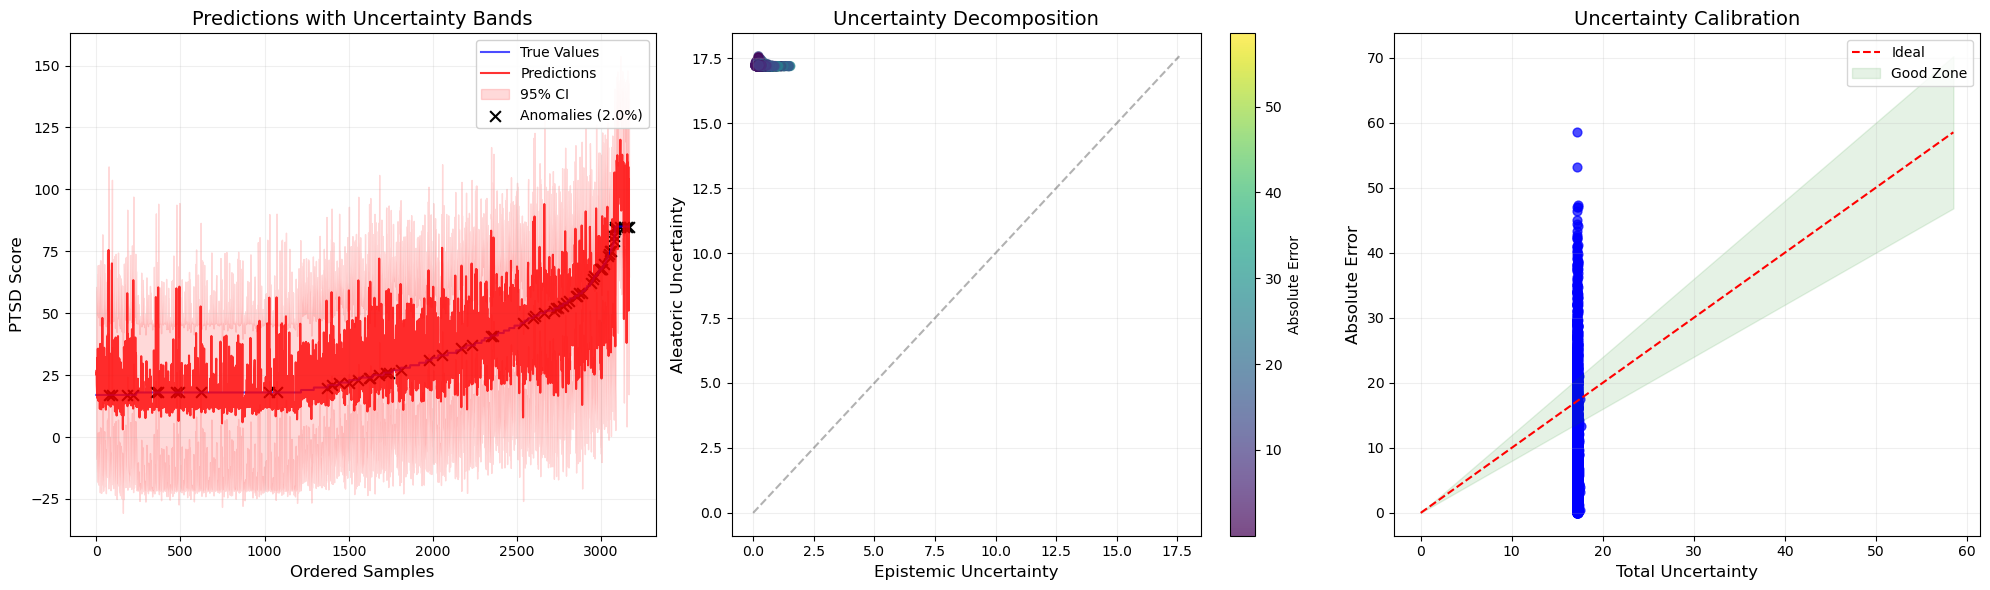


Test Set Visualization:


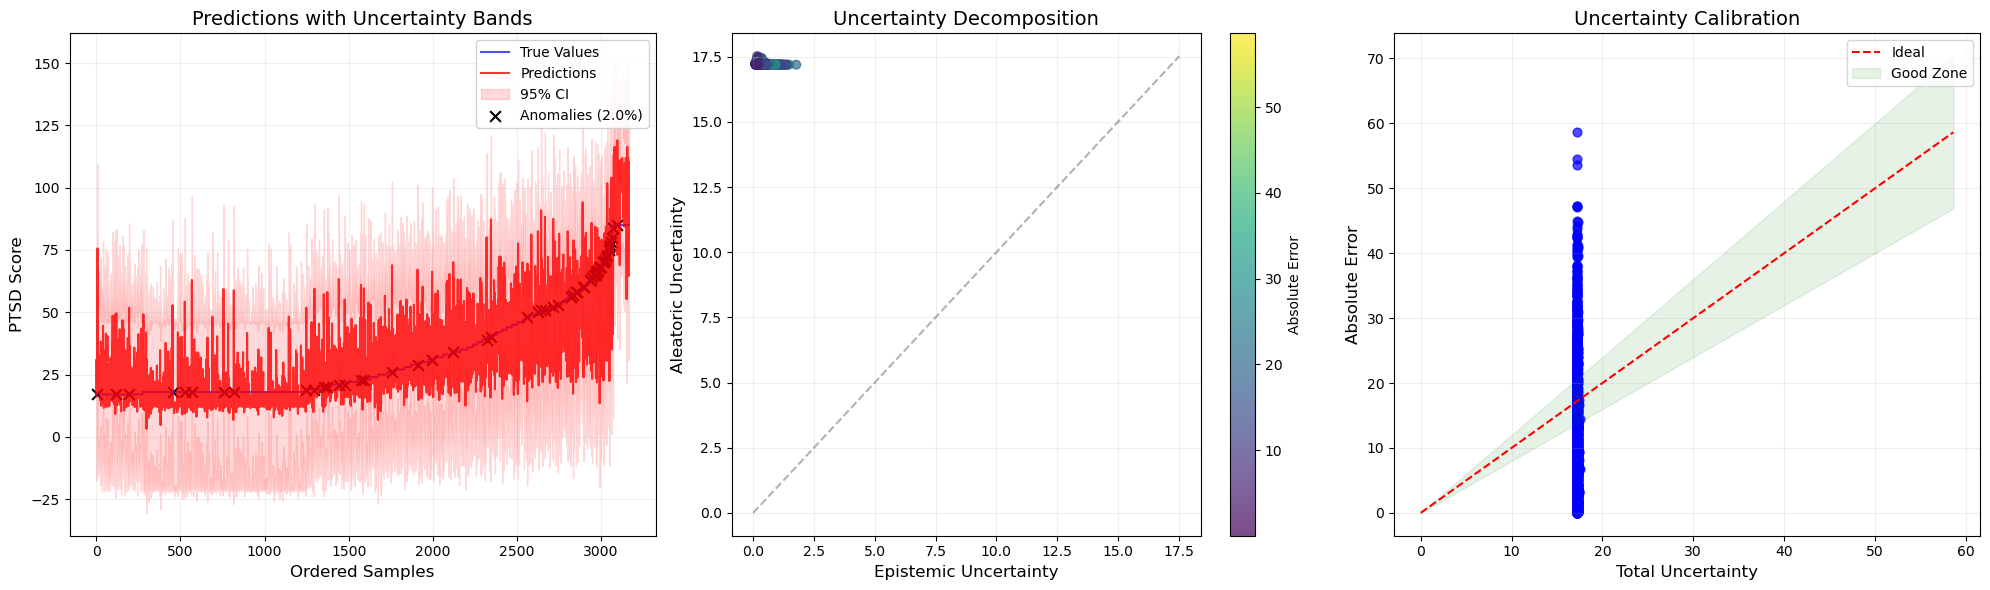

In [33]:
# =============================================
# Visualization Only (after evaluation)
# =============================================
def plot_results(y_true, results, figsize=(20, 6)):
    plt.figure(figsize=figsize)
    
    # Plot 1: Predictions with uncertainty
    plt.subplot(1, 3, 1)
    order = np.argsort(y_true.values)
    plt.plot(y_true.values[order], 'b-', alpha=0.7, label='True Values', linewidth=1.5)
    plt.plot(results['pred_mean'][order], 'r-', alpha=0.8, label='Predictions', linewidth=1.5)
    plt.fill_between(
        np.arange(len(order)),
        (results['pred_mean'] - 1.96*results['total_std'])[order],
        (results['pred_mean'] + 1.96*results['total_std'])[order],
        color='red', alpha=0.15, label='95% CI'
    )
    
    if results['anomalies'] is not None:
        anomaly_indices = np.where(results['anomalies'][order])[0]
        plt.scatter(anomaly_indices, y_true.values[order][anomaly_indices],
                   c='black', marker='x', s=60, 
                   label=f'Anomalies ({results["anomaly_rate"]:.1%})',
                   linewidths=1.5)
    
    plt.xlabel('Ordered Samples', fontsize=12)
    plt.ylabel('PTSD Score', fontsize=12)
    plt.title('Predictions with Uncertainty Bands', fontsize=14)
    plt.legend(fontsize=10, framealpha=0.9)
    plt.grid(True, alpha=0.2)
    
    # Plot 2: Uncertainty decomposition
    plt.subplot(1, 3, 2)
    plt.scatter(results['epistemic_std'], results['aleatoric_std'],
               c=np.abs(y_true.values - results['pred_mean']),
               cmap='viridis', alpha=0.7, s=40)
    plt.colorbar(label='Absolute Error')
    
    max_unc = max(max(results['epistemic_std']), max(results['aleatoric_std']))
    plt.plot([0, max_unc], [0, max_unc], 'k--', alpha=0.3)
    plt.xlabel('Epistemic Uncertainty', fontsize=12)
    plt.ylabel('Aleatoric Uncertainty', fontsize=12)
    plt.title('Uncertainty Decomposition', fontsize=14)
    plt.grid(True, alpha=0.2)
    
    # Plot 3: Error vs Uncertainty
    plt.subplot(1, 3, 3)
    errors = np.abs(y_true.values - results['pred_mean'])
    plt.scatter(results['total_std'], errors, alpha=0.7, s=40,
               c=results.get('anomaly_probs', 'blue'),
               cmap='coolwarm' if 'anomaly_probs' in results else None)
    
    if 'anomaly_probs' in results:
        plt.colorbar(label='Anomaly Probability')
    
    max_val = max(max(results['total_std']), max(errors))
    plt.plot([0, max_val], [0, max_val], 'r--', label='Ideal')
    plt.fill_between([0, max_val], [0, max_val*0.8], [0, max_val*1.2],
                    color='green', alpha=0.1, label='Good Zone')
    plt.xlabel('Total Uncertainty', fontsize=12)
    plt.ylabel('Absolute Error', fontsize=12)
    plt.title('Uncertainty Calibration', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.2)
    
    plt.tight_layout()
    plt.show()

# Generate visualizations after evaluation
print("\nGenerating Visualizations...")
print("\nValidation Set Visualization:")
plot_results(y_val, val_results)

print("\nTest Set Visualization:")
plot_results(y_test, test_results)